# Statistics Exercise 5: Bayesian Inference

In this exercise, we will exercise our Bayesian skills to understand MAP estimation and Bayesian updating.

## Part 1: ML vs. MAP Heights

For this problem we will assume that human heights are distributed according to $\mathcal{N}(\mu, 10)$ for some $\mu$ (measured in centimeters).

Suppose that we observe the following heights in our class of 20 students:

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [13]:
X = [
  173.4, 171.7, 175.7, 166.2, 171.2,
  195.6, 177.6, 172.7, 177.5, 181.5,
  175.7, 180.8, 190.0, 189.5, 189.3,
  166.6, 160.6, 182.3, 174.9, 177.5
]

**Questions:**
1. What is $\hat{\mu}_{MLE}$ given the data above?


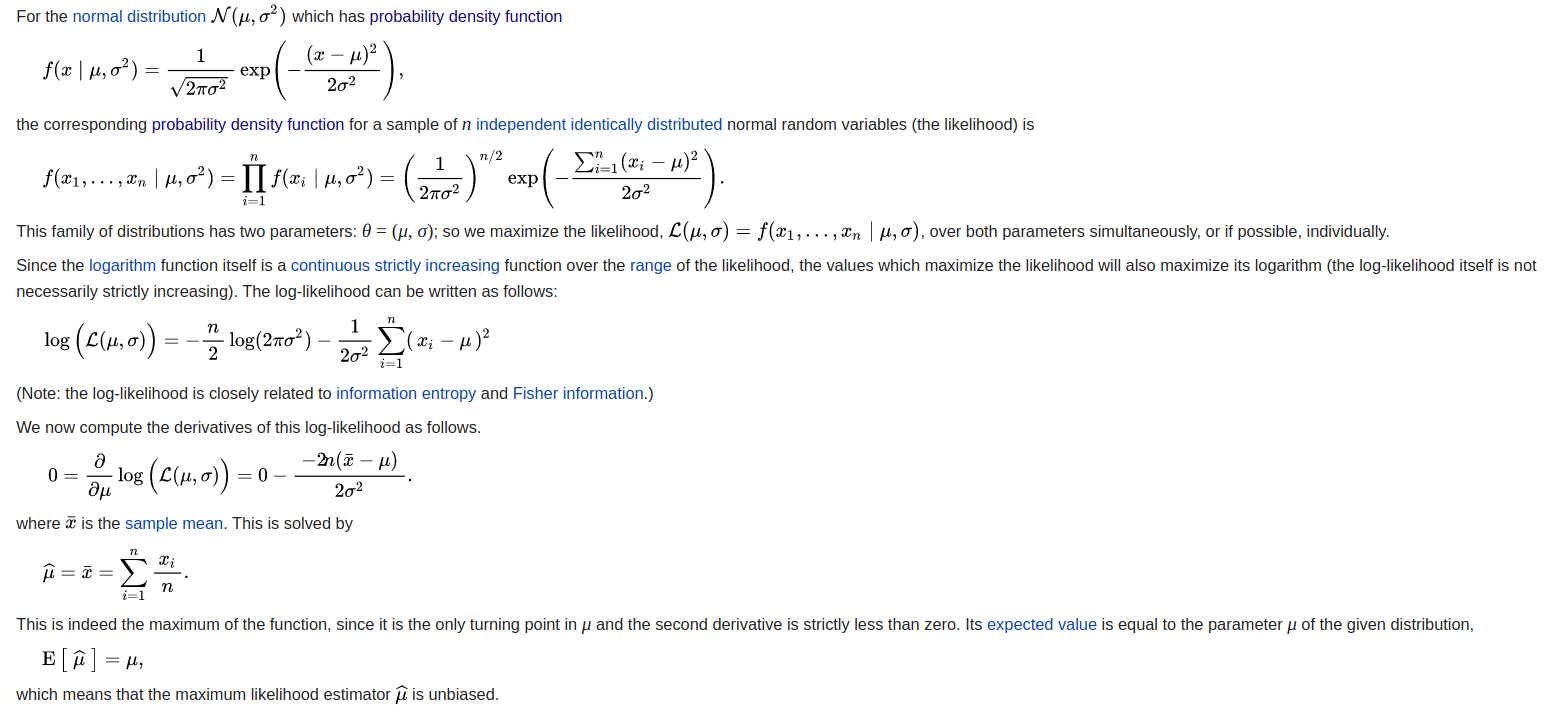

In [14]:
x_sum = np.sum(X)
n = len(X)
mu_MLE = x_sum/n

In [19]:
print('The 𝜇̂ 𝑀𝐿𝐸 given the data above is {}'.format(mu_MLE))

The 𝜇̂ 𝑀𝐿𝐸 given the data above is 177.51500000000001


2. Suppose we we start with the prior $\mathcal{N}(170, 50)$ on $\mu$, based on our previous expectations about human height. What is $\hat{\mu}_{MAP}$? Write out the formula for the log-posterior $\log P(\mu | X)$ and maximize it for $\mu$ by taking the derivative with respect to $\mu$. You should get a value very close to, but different than, $\hat{\mu}_{MLE}$.

Maximum A Posteriori (MAP) Estimator for a parameter  𝜇̂,
given observed data X:
i was using formula from wiki
https://en.wikipedia.org/wiki/Maximum_a_posteriori_estimation

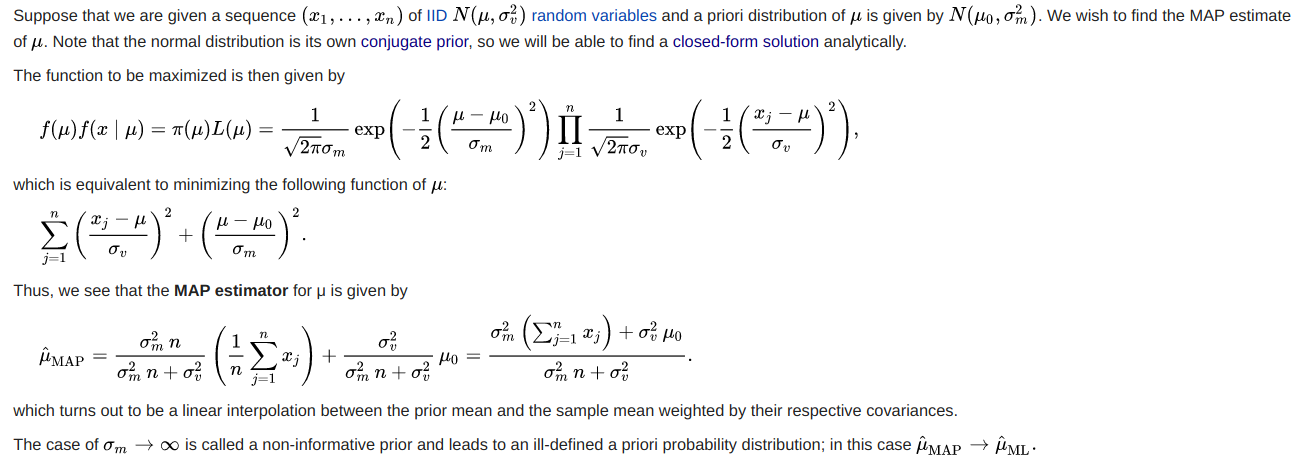

In [20]:
n = len(X)
sigma_sq = 10
mu = np.mean(X)
sigma_priori = 50
mu_priori_sq = 170
x_sum = np.sum(X)

mu_MAP = (sigma_priori*x_sum + sigma_sq*mu_priori_sq )/(sigma_priori*n + sigma_sq)

print('a value µˆMAP = {}\nit is  very close to, but different than,  𝜇̂ 𝑀𝐿𝐸 = {}'.format(mu_MAP, mu_MLE))

a value µˆMAP = 177.44059405940595
it is  very close to, but different than,  𝜇̂ 𝑀𝐿𝐸 = 177.51500000000001


## Part 2: A Bayesian coin

For this problem we will illustrate the concept of Bayesian updating of a prior using repeated sampling.

**Questions:**
  1. If we have a coin $X \sim \text{Bernoulli}(p)$ with unknown parameter $p$ (coin may be weighted), and observe the sequence of flips 0-0-0-1, what is $\hat{p}_{MLE}$?
  2. If we have uniform prior on $p \in [0, 1]$, what is $\hat{p}_{MAP}$?
  3. If we start with uniform prior on $p$, let's see how the prior updates after we observe the flips 0-0-0-1. Do the following:
    * Create a Python generator pick_p() which chooses some $p$ from the uniform distribution on $[0, 1]$ (use np.random.uniform), draws from $\text{Bernoulli}(p)$ four times, and if the result is $[0, 0, 0, 1]$ yields p.
    * Take 10,000 elements from the generator pick_p() and save them in an array *p_posterior*.
    * Plot a histogram of *p_posterior* with 100 bins. Where is the histogram the highest?
  4. The distribution of the values in *p_posterior* approximates the posterior probability of $p$ after observing 0-0-0-1. In fact, it is approximately a Beta distribution. Sample from np.random.beta 10,000 times and plot the histogram of values on top of the previous histogram (use alpha=0.5). You should find parameters $a$ and $b$ such that np.random.beta(a, b, size = 10000) has a very similar histogram to the histogram from question 3. (Hint: You may use trial and error. $a$ and $b$ are positive integers less than 5.)

(Bonus reading: For those who are interested, for this problem we used what is known as [Monte Carlo sampling](https://en.wikipedia.org/wiki/Monte_Carlo_method).)



### 2.1   If we have a coin  𝑋∼Bernoulli(𝑝)  with unknown parameter  𝑝  (coin may be weighted), and observe the sequence of flips 0-0-0-1, what is  𝑝̂ 𝑀𝐿𝐸 ?

$P((x=0-0-0-1| Bernoulli(p))) = p(1-p)^3$

we need to find a maximum for the P so derivarive should be equal to zero

$P' = (1-p)^3 - 3p(1-p)^2 = (1-p)^2(1-4p)$
--> $p = 1$ or $p = 1/4$

maximum - $p = 1/4$

$\hat{p}_{MLE} = 1/4$
$P((x=0-0-0-1| Bernoulli(p))) = p(1-p)^3$
p = 0.25




### 2.2 If we have uniform prior on  𝑝∈[0,1] , what is  𝑝̂ 𝑀𝐴𝑃 ?

Use Bayes's formula

f(p|y = 0,0,0,1) = (f(p) * P(y = 0,0,0,1)p) / P(y = 0,0,0,1)

There are not p in the denominator, so we can find a maximum only for numerator f(p) * P(y = 0,0,0,1)

But for uniform distribution p = 1 for 𝑝∈ $[0, 1]$,  f(p) = 1
and we have to find maximum only for  P(y = 0,0,0,1)

$\hat{p}_{MAP}$ = $\hat{p}_{MLE} = 0.25$

In [17]:
p = np.random.uniform(0,1)
a = np.random.binomial(1, p, size=4)
a

array([0, 0, 0, 0])

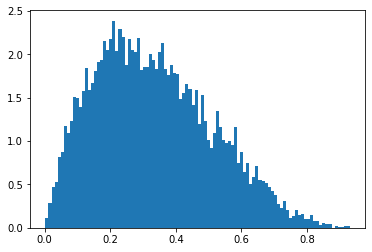

10000


In [6]:
# 2.3 If we start with uniform prior on  𝑝 , let's see how the prior 
# updates after we observe the flips 0-0-0-1. Do the following:
# Create a Python generator pick_p() which chooses some  𝑝  from 
# the uniform distribution on  [0,1]  (use np.random.uniform), draws from  Bernoulli(𝑝)  
# four times, and if the result is  [0,0,0,1]  yields p.

def pick_p(n):
    flips = [0,0,0,1]
    while n > 0:
        p = np.random.uniform(0,1)
        a = np.random.binomial(1, p, size=4)
        if list(a) == flips:
            n -= 1
            yield p


# Take 10,000 elements from the generator pick_p() and save them in an array p_posterior.
p_posterior = np.array(list(pick_p(10000)))
# Plot a histogram of p_posterior with 100 bins. 
plt.hist(p_posterior,bins=100, density=True)
plt.show()
# Where is the histogram the highest?
'''the histogram is a little right skewed, and the highest point about x = 0.35'''
print(len(p_posterior))

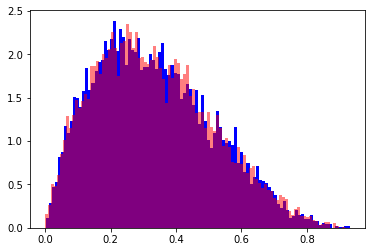

In [11]:
# 2.4 The distribution of the values in p_posterior approximates 
# the posterior probability of  𝑝  after observing 0-0-0-1. In fact, 
# it is approximately a Beta distribution.
# Sample from np.random.beta 10,000 times 
sample = np.random.beta(2,4,size=10000)
# and plot the histogram of values on top of the previous histogram (use alpha=0.5). 
plt.hist(p_posterior,bins=100,color='blue', density=True)
plt.hist(sample,bins=100,color='red', density=True,alpha=0.5)
plt.show()
# You should find parameters  𝑎  and  𝑏  such that np.random.beta(a, b, size = 10000) 
# has a very similar histogram to the histogram from question 3. 
# (Hint: You may use trial and error.  𝑎  and  𝑏  are positive integers less than 5.)